## Import Dependencies

In [1]:
import numpy as np
from Scripts import VoxelizeData
from Scripts import VoxNet
import torch
import matplotlib.pyplot as plt

## Voxelize Necessary Datasets

### Voxelize ModelNet40 Dataset

In [2]:
path = './Data/ModelNet40/'
dataset = 'ModelNet40'

# vox = VoxelizeData.Voxelize(path, dataset, system='Windows', save=True, save_path=path, overwrite=False)

### Test Voxelized ModelNet40 Data

(9843, 32, 32, 32)
(9843,)
(2468, 32, 32, 32)
(2468,)
epoch: 5
epoch: 10
Training accuracy: 9.039087947882736
Testing accuracy: 4.058441558441558
epoch: 15
epoch: 20
Training accuracy: 9.028908794788274
Testing accuracy: 4.058441558441558
epoch: 25
epoch: 30
Training accuracy: 21.294788273615637
Testing accuracy: 16.314935064935064
epoch: 35
epoch: 40
Training accuracy: 25.570032573289904
Testing accuracy: 19.84577922077922
epoch: 45
epoch: 50
Training accuracy: 26.36400651465798
Testing accuracy: 20.738636363636363
epoch: 55
epoch: 60
Training accuracy: 30.48656351791531
Testing accuracy: 25.730519480519483
epoch: 65
epoch: 70
Training accuracy: 30.384771986970684
Testing accuracy: 24.2288961038961
epoch: 75
epoch: 80
Training accuracy: 33.81514657980456
Testing accuracy: 26.8262987012987
epoch: 85
epoch: 90
Training accuracy: 32.023615635179155
Testing accuracy: 26.501623376623378
epoch: 95
epoch: 100
Training accuracy: 33.98819218241043
Testing accuracy: 26.37987012987013


Text(0.5, 0, 'Epochs')

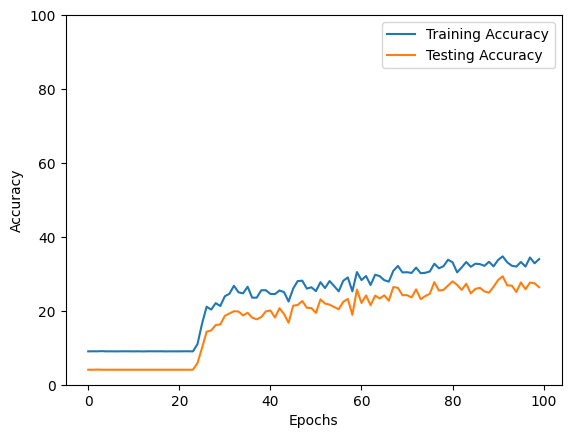

In [5]:
# Load training data
data = np.load('Data/ModelNet40/ModelNet40Train.npz', allow_pickle=True)

# Parser cuts off anything with an underscore. This array is modified to match
modelnet_labels = [
    'airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car',
    'chair', 'cone', 'cup', 'curtain', 'desk', 'door', 'dresser', 'flower',
    'glass', 'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'monitor',
    'night', 'person', 'piano', 'plant', 'radio', 'range', 'sink',
    'sofa', 'stairs', 'stool', 'table', 'tent', 'toilet', 'tv', 'vase',
    'wardrobe', 'xbox'
]

train_data = data['data']
train_labels = data['labels']

print(train_data.shape)
print(train_labels.shape)

# Convert labels to integer values so they can be converted to tensors
label_as_int = []
for i in data['labels']:
   label_as_int.append(int(modelnet_labels.index(i)))

train_data = torch.utils.data.TensorDataset(torch.FloatTensor(train_data),torch.LongTensor(label_as_int))

# vox.render(train_data[0])

# Load test data
data = np.load('Data/ModelNet40/ModelNet40Test.npz', allow_pickle=True)

test_data = data['data']
test_labels = data['labels']

print(test_data.shape)
print(test_labels.shape)

# Convert labels to integer values so they can be converted to tensors
label_as_int = []
for i in data['labels']:
   label_as_int.append(int(modelnet_labels.index(i)))

test_data = torch.utils.data.TensorDataset(torch.FloatTensor(test_data),torch.LongTensor(label_as_int))

# vox.render(test_data[0])

# Hyperparameters
batch_size = 32
num_classes = 40
learning_rate = 0.01 # Decreases by a factor of 10 every 40000 batches
momentum = 0.9
weight_decay = 0.001
epochs = 100
batch_number = 0

# Load data in batch sizes
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2)

model = VoxNet.VoxNet(num_classes)
model = model.float()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
criterion = torch.nn.CrossEntropyLoss()

training_accuracy = []
testing_accuracy = []

for epoch in range(epochs):
    if epoch % 5 == 4:
        print("epoch:", epoch+1)
    
    for (vox_grids, vox_labels) in train_loader:
        batch_number += 1

        if batch_number % 40000 == 0:
            print("Decreasing learning rate")
            learning_rate *= 0.1

        # print(len(vox_grids))
        if (len(vox_grids) < batch_size):
            continue

        output = model(vox_grids)
        loss = criterion(output, vox_labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test VoxNet after training
    with torch.no_grad():
        num_correct = 0
        total = 0

        for (grids, labels) in train_loader:
            if (len(grids) < batch_size):
                continue
            
            output = model(grids)

            _, predictions = torch.max(output, 1)

            num_correct += (predictions == labels).sum().item()
            total += labels.shape[0]
        
        accuracy = (num_correct / total) * 100.0
        training_accuracy.append(accuracy)
        if epoch % 10 == 9:
            print("Training accuracy:", accuracy)

        num_correct = 0
        total = 0

        for (grids, labels) in test_loader:
            if (len(grids) < batch_size):
                continue
            
            output = model(grids)

            _, predictions = torch.max(output, 1)

            num_correct += (predictions == labels).sum().item()
            total += labels.shape[0]
        
        accuracy = (num_correct / total) * 100.0
        testing_accuracy.append(accuracy)
        if epoch % 10 == 9:
            print("Testing accuracy:", accuracy)

line_one = plt.plot(range(len(training_accuracy)), training_accuracy, label='Training Accuracy')
line_two = plt.plot(range(len(testing_accuracy)), testing_accuracy, label='Testing Accuracy')
plt.legend()
plt.ylim(0,100.0)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

### Voxelize Toy4K Dataset

In [4]:
path = 'Data/toys4k_obj_files/'
dataset = 'Toys4K'

vox = VoxelizeData.Voxelize(path, dataset, system='Unix', render=True, save=True, save_path=path, overwrite=False)

Voxelizing Toys4K dataset...
Voxelizing train meshes of the airplane class...


FileNotFoundError: [WinError 2] The system cannot find the file specified